# Universal law of generalization
Let's implement Roger Shepard's universal law of generalization model. First of all, don't fret about how much you do or don't know about coding. Everything is provided here and there are explicit instructions on what and where to change parts of the code. 

To begin with, we need to import some handy python libraries:

In [25]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sns

Next, we'll load in the data we are using for the homework. The dataset consists of 14 different colors defined by their RGB values (stored in the `color_label` array below) and their coordinate locations in CIELAB colour space. CIELAB provides a colour space that mimics how humans see colours (see https://en.wikipedia.org/wiki/Lab_color_space for more info). In other words, CIELAB provides a **psychological space** of colours. 

In [4]:
color_label = np.array([[0.4371,0,1.0000],[0.3433,0,1.0000],[0,0.3425,1.0000],[0,0.5445,1.0000],
                        [0,0.8255,0.7401],[0,0.9930,0.3840],[0,1.0000,0],[0.5963,1.0000,0],
                        [1.0000,0.7727,0],[1.0000,0.4384,0],[1.0000,0.0403,0],[1.0000,0,0],
                        [0.8170,0,0],[0.4306,0,0]])
color_pos = np.array([[-0.1530,-0.4352],[-0.1778,-0.3946],[-0.4343,-0.2730],[-0.4657,-0.2426],
                      [-0.4768,0.0639],[-0.3993,0.3136],[-0.2638,0.4160],[-0.1493,0.4715],
                      [0.2711,0.3550],[0.4004,0.1876],[0.4948,0.0357],[0.4856,-0.1096],
                      [0.4411,-0.1669],[0.4270,-0.2215]])

To see what this psychological space of colours looks like, run the plotting commands below:

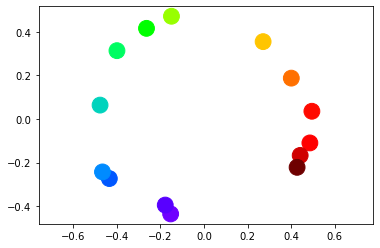

In [5]:
plt.scatter(color_pos[:,0],color_pos[:,1],c=color_label,s=250)
plt.axis('equal');

As you can see, CIELAB space places similar colours close to each other. We can use this psychological space to determine precisely how similar each colour is to every other color. The goal is to use Shepard's Law of Generalization to make predictions about these similarities. 

Let's start with determining the distances separating the colours.

## Euclidean distance
Euclidean distance between any two points, a and b, in 2-D space is determined by the following equation:

![](https://dl.dropboxusercontent.com/s/9dt07woa1m5clc8/euclidean_distance.png)

Let's try to calculate the Euclidean distance between the first two colours. First, grab the two colours from the `color_pos` array:

In [11]:
color1 = color_pos[0] 
color2 = color_pos[1]
print(color1,color2)

[-0.153  -0.4352] [-0.1778 -0.3946]


Now calculate the difference between the colours' x and y positions. Fill the in `??` with code that calculates these differences:

In [13]:
# ADD YOUR CODE HERE
xdiff = color1[0]-color2[0]
ydiff = color1[1]-color2[1]
print(xdiff,ydiff)

0.024800000000000016 -0.04059999999999997


The code should give the answer `0.0248 -0.0406`. If you didn't find this result, try rewriting the code to give the correct output.

Once you have differences correctly calculated, you can move onto the rest of the calculations for Euclidean distance. To do so, you need to:
1. Square the differences (note: the `**` operator performs a power calculation, e.g., `2**3` raises 2 to the 3rd power)
2. Add the squared differences
3. Take the square root of the sum (note: using a fraction with `**` can result in a root, e.g., `2**0.5` calculates the square root of 2)

Write a separate line of code for each of these steps:

In [17]:
# ADD YOUR CODE HERE
xdiffsquared = xdiff**2
ydiffsquared = ydiff**2
sumsquared = xdiffsquared+ydiffsquared
dist = sumsquared**0.5
print(dist)

0.04757520362541813


The correct Euclidean distance is `0.0475752036254`. Don't continue until your code gives this result.

We can see that the first two colours are separated by a small distance, which according to Shepard's model, means they are likely similar to each other. Let's calculate the remaining distances between all pairs of colours. To do this, we can create a function named `euclidean_distance` that we can reuse later. Here, you'll want to take the code you wrote above and fill in this `euclidean_distance` function defined below.

In [19]:
def euclidean_distance(color1,color2):
    # ADD YOUR CODE HERE
    xdiff = color1[0]-color2[0]
    ydiff = color1[1]-color2[1]
    xdiffsquared = xdiff**2
    ydiffsquared = ydiff**2
    sumsquared = xdiffsquared+ydiffsquared
    dist = sumsquared**0.5
    return dist

After you fill in the function above and execute the cell, let's check the output of the function. This function works by giving it the coordinate locations of two colours. We can give it the first and second colours to see if we get the same distance we calculated before:

In [20]:
testdist = euclidean_distance(color1,color2)
print(testdist)

0.04757520362541813


If the function is correct, you should see the output of `0.04757520362541813`. If not, check your code to make sure you have the correct calculations.

Once the `euclidean_distance` function is working correctly, you can calculate the difference between all of the color pairs with the following code:

In [22]:
color_dists = np.zeros((14,14))
for c1 in range(0,14):
    for c2 in range(0,14):
        color_dists[c1][c2] = euclidean_distance(color_pos[c1],color_pos[c2])

One way to view all of the pairwise distances is to use a heat map plot:

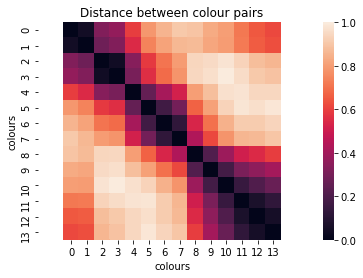

In [33]:
axs = sns.heatmap(color_dists)
plt.title('Distance between colour pairs')
plt.xlabel('colours')
plt.ylabel('colours')
axs.axis('equal');

Each cell in the heat map plot corresponds to a distance between a pair of colours. The "hotter" the cell is (i.e., more red), the greater the distance; the "cooler" a cell is (i.e., more blue), the shorter the distance. Make sure your heat map looks similar to this:

![](https://dl.dropboxusercontent.com/s/f2l1oh0fhjb7sa1/distance.png)


## Exponential law of generalization
We are almost there! To calculate similarity, as defined by Shepard, we need to transform distance according to the exponential law of generalization. Specifically, the similarity between a and b, given their distance, d(a,b), is defined as:

![](https://dl.dropboxusercontent.com/s/bba6x5bkmk4svsr/exponential_law.png)

Write the code to implement this below. A couple of notes:
1. The numpy library includes an exponential function, e.g., `np.exp()`.
2. Calculations on each value in the `color_dists` array can be perfomed with one line of code, e.g., `-1*color_dists` results in each value being multipied by -1.

In [35]:
# ADD YOUR CODE HERE
color_sims = np.exp(-color_dists)
print(color_sims[0][1])

0.9535387608643551


The similarity between the first and second colour (indexed by `color_sims[0][1]`) should be `0.953538760864`. If your output doesn't match that, check your code. 

Once you have the correct output, we can look at the results with a heat map plot:

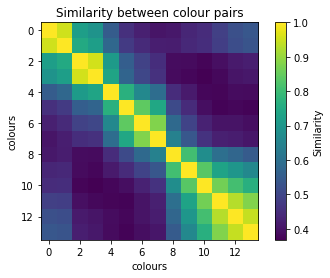

In [36]:
plt.imshow(color_sims,interpolation='nearest')
plt.title('Similarity between colour pairs')
plt.xlabel('colours')
plt.ylabel('colours')
plt.colorbar(label='Similarity');

This time, hot colors correspond with colour pairs that are very similar, cold colors correspond with different colours.

Finally, we can plot model predicted similarity as a function of distance in psychological space, similar to the results figures we saw in Shepard's paper.

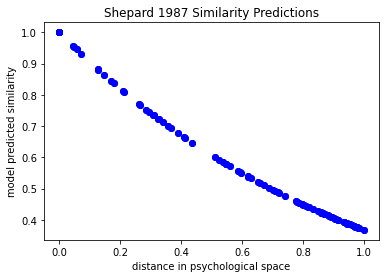

In [37]:
plt.plot(color_dists.ravel(),color_sims.ravel(),'bo') 
plt.xlabel('distance in psychological space')
plt.ylabel('model predicted similarity')
plt.title('Shepard 1987 Similarity Predictions');

## Comparing model predictions to human colour similarity data
As a final step, we can assess the predictions of the model by comparing it to human similarity ratings for these 14 colours. Below, you'll find similarity data from a study published long ago (Ekman, 1954, Dimensions of Color Vision, Journal of Psychology). Each value corresponds to the probability that human participants labeled two colours as the same. 

In [39]:
rating_sims = np.array([[1.00,0.74,0.36,0.26,0.16,0.06,0.06,0.05,0.04,0.07,0.07,0.11,0.15,0.12,],
                        [0.74,1.00,0.30,0.33,0.15,0.09,0.04,0.05,0.04,0.05,0.06,0.07,0.08,0.11,],
                        [0.36,0.30,1.00,0.68,0.22,0.13,0.09,0.06,0.03,0.03,0.03,0.03,0.04,0.05,],
                        [0.26,0.33,0.68,1.00,0.33,0.18,0.11,0.08,0.04,0.03,0.04,0.02,0.04,0.06,],
                        [0.16,0.15,0.22,0.33,1.00,0.49,0.24,0.22,0.07,0.04,0.03,0.03,0.04,0.04,],
                        [0.06,0.09,0.13,0.18,0.49,1.00,0.70,0.33,0.10,0.05,0.03,0.03,0.03,0.03,],
                        [0.06,0.04,0.09,0.11,0.24,0.70,1.00,0.79,0.15,0.07,0.05,0.04,0.04,0.03,],
                        [0.05,0.05,0.06,0.08,0.22,0.33,0.79,1.00,0.28,0.11,0.06,0.05,0.04,0.05,],
                        [0.04,0.04,0.03,0.04,0.07,0.10,0.15,0.28,1.00,0.55,0.24,0.15,0.15,0.11,],
                        [0.07,0.05,0.03,0.03,0.04,0.05,0.07,0.11,0.55,1.00,0.70,0.41,0.49,0.22,],
                        [0.07,0.06,0.03,0.04,0.03,0.03,0.05,0.06,0.24,0.70,1.00,0.71,0.50,0.33,],
                        [0.11,0.07,0.03,0.02,0.03,0.03,0.04,0.05,0.15,0.41,0.71,1.00,0.77,0.69,],
                        [0.15,0.08,0.04,0.04,0.04,0.03,0.04,0.04,0.15,0.49,0.50,0.77,1.00,0.95,],
                        [0.12,0.11,0.05,0.06,0.04,0.03,0.03,0.05,0.11,0.22,0.33,0.69,0.95,1.00]])

If Shepard's model accurately predicts how people judge similarity, the model predictions we calculated should match the human data above. We can assess this correspondence by plotting the model predictions along with the human similarity data.

In [ ]:
plt.plot(color_dists.ravel(),color_sims.ravel(),'bo')
plt.plot(color_dists.ravel(),rating_sims.ravel(),'rx')
plt.xlabel('distance in psychological space')
plt.ylabel('similarity')
plt.title('Model Predictions vs. Human Ratings')
plt.legend(['model','humans']);

Uh-oh, that doesn't look like a very good fit. The model does seems to capture the overall shape, but the scaling is off. If you remember our discussion during class, Shepard actually included a scaling parameter in the exponential function relating distance to similarity, but that was sort of glossed over in the paper. Here's the equation with this scaling parameter, `c`:

![](https://dl.dropboxusercontent.com/s/jhferwwg9jshjew/exponential_law2.png)

Let's try to get a better fit using this version of the model:
1. Rewrite the exponential generalization code to include the scaling paramter `c`
2. Try setting `c` to different values to get a better fit to the human similarity judgments by re-running the cell below.


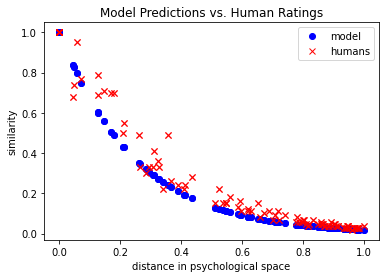

In [42]:
# ADD CODE HERE
c = 4 # change the scaling parameter to see how it affects the model similarity predictions
color_sims = np.exp(-c*color_dists) # rewrite the exponential function to include the scaling parameter c

# replot the model predictions and human data
plt.plot(color_dists.ravel(),color_sims.ravel(),'bo')
plt.plot(color_dists.ravel(),rating_sims.ravel(),'rx')
plt.xlabel('distance in psychological space')
plt.ylabel('similarity')
plt.title('Model Predictions vs. Human Ratings')
plt.legend(['model','humans']);

Once you have found a scaling parameter value that gives a good fit, you're finished! Make sure to save your notebook.